<ins>Instructions</ins>: what changes should the company make in order to reduce attrition.

# About

Information about the project can be found in [Day 10/Attrition Rate Analysis - Hypothesis.ipynb](../Day%2010/Attrition%20Rate%20Analysis%20-%20Hypothesis.ipynb)

# Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('general_data.csv')

# Drop columns we're not interested in
df.drop(['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Drop rows with missing values
df = df.dropna()

# Convert Attrition to numerical
df['Attrition01'] = df['Attrition'].map(dict(Yes=1, No=0))
df = df.reindex(columns=sorted(df.columns))
df.head()

,Age,Attrition,Attrition01,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,...,Single,23420,4.0,12,2,9.0,2,6,0,4


In [2]:
df.columns

Index(['Age', 'Attrition', 'Attrition01', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [3]:
df.dtypes

Age                          int64
Attrition                   object
Attrition01                  int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [4]:
n = df.shape[0]
print(n)

4382


# Analysis

In [5]:
dfTest = pd.DataFrame(data=[], columns=['ColumnName', 'R', 'PValue'])

# Check numeric features
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

columns = df._get_numeric_data().columns.drop('Attrition01')
for column in columns:
    r,p = pearsonr(df.Attrition01, df[column])

    if p<0.05:
        dfTest.loc[len(dfTest)] = [column, r, p]

# Check categorical features
columns = df.select_dtypes('object').columns.drop('Attrition')

for column in columns:
    crosstab = pd.crosstab(df.Attrition01, df[column])
    chi2,p,dof,expected = chi2_contingency(crosstab)

    if p<0.05:
        dfTest.loc[len(dfTest)] = [column, (chi2/n)**0.5, p]

print("The following features have correlations with attrition:")

dfTest['R2'] = dfTest['R']**2*100
dfTest.sort_values(by=['R2'], ascending=False)

The following features have correlations with attrition:


,ColumnName,R,PValue,R2
13,MaritalStatus,0.174778,8.573052e-30,3.054721
4,TotalWorkingYears,-0.169670,1.164543e-29,2.878788
0,Age,-0.158399,5.126598e-26,2.509014
8,YearsWithCurrManager,-0.154692,7.105370e-25,2.392947
6,YearsAtCompany,-0.133003,9.476118e-19,1.768970
9,BusinessTravel,0.126459,6.070197e-16,1.599177
11,EducationField,0.099213,3.472896e-08,0.984319
10,Department,0.076872,2.382971e-06,0.590925
12,JobRole,0.070684,5.116593e-03,0.499629
5,TrainingTimesLastYear,-0.047586,1.627660e-03,0.226440


## Marital Status

In [6]:
crosstab = pd.crosstab(df.Attrition01, df.MaritalStatus, margins=True)
crosstab_proprow = round(crosstab.div(crosstab.iloc[:,-1], axis=0).mul(100, axis=0), 2)
display(crosstab_proprow.style.background_gradient(cmap='Blues'))

crosstab_propcol = round(crosstab.div(crosstab.iloc[-1,:], axis=1).mul(100, axis=1), 2)
display(crosstab_propcol.style.background_gradient(cmap='Blues'))

MaritalStatus,Divorced,Married,Single,All
Attrition01,,,,
0,23.71,47.76,28.53,100
1,13.9,35.6,50.5,100
All,22.14,45.8,32.06,100


MaritalStatus,Divorced,Married,Single,All
Attrition01,,,,
0,89.9,87.49,74.66,83.91
1,10.1,12.51,25.34,16.09
All,100,100,100,100


Text(0.5, 1.0, 'Attrition relative to marital status')

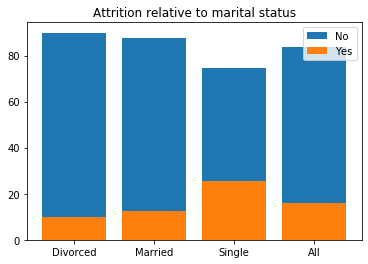

In [7]:
plt.bar(crosstab_propcol.columns, crosstab_propcol.iloc[0], label="No")
plt.bar(crosstab_propcol.columns, crosstab_propcol.iloc[1], label="Yes")
plt.legend()
plt.title("Attrition relative to marital status")

People that are single are more likely to leave. Probably because the others have a family to provide for. Although interesting, this isn't a feature the company can act upon.

## Total working years

In [8]:
dfYes = df[df['Attrition'] == 'Yes']
dfNo  = df[df['Attrition'] == 'No']

In [9]:
dfGroupsAll = df[['TotalWorkingYears', 'Attrition01']] \
    .groupby('TotalWorkingYears').count() \
    .merge(
        dfYes[['TotalWorkingYears', 'Attrition01']].groupby('TotalWorkingYears').count(),
        on='TotalWorkingYears',
        how='left'
    ).rename(columns = {
        'Attrition01_x': 'Attrition_all',
        'Attrition01_y': 'Attrition_yes'
    }).merge(
        dfNo[['TotalWorkingYears', 'Attrition01']].groupby('TotalWorkingYears').count(),
        on='TotalWorkingYears',
        how='left'
    ).rename(columns = {
        'Attrition01': 'Attrition_no'}
    ).fillna(0)

dfGroupsAll.head()

,Attrition_all,Attrition_yes,Attrition_no
TotalWorkingYears,,,
0.0,32,14.0,18.0
1.0,241,119.0,122.0
2.0,93,27.0,66.0
3.0,126,27.0,99.0
4.0,188,36.0,152.0


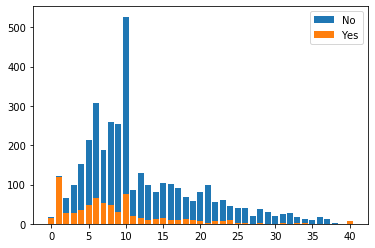

In [10]:
plt.bar(dfGroupsAll.index, dfGroupsAll.Attrition_no, label="No")
plt.bar(dfGroupsAll.index, dfGroupsAll.Attrition_yes, label="Yes")
plt.legend()

In [11]:
for i in range(5):
    row = dfGroupsAll.loc[i]
    print(i, ":", (row.Attrition_yes/row.Attrition_all)*100)

0 : 43.75
1 : 49.37759336099585
2 : 29.03225806451613
3 : 21.428571428571427
4 : 19.148936170212767


People that are new to the job market are much more likely to leave. Almost 50% of people with a year of experience leave.

### Total Working Years vs Job Level

Text(0.5, 1, 'Job Level: Total Working Years > 1')

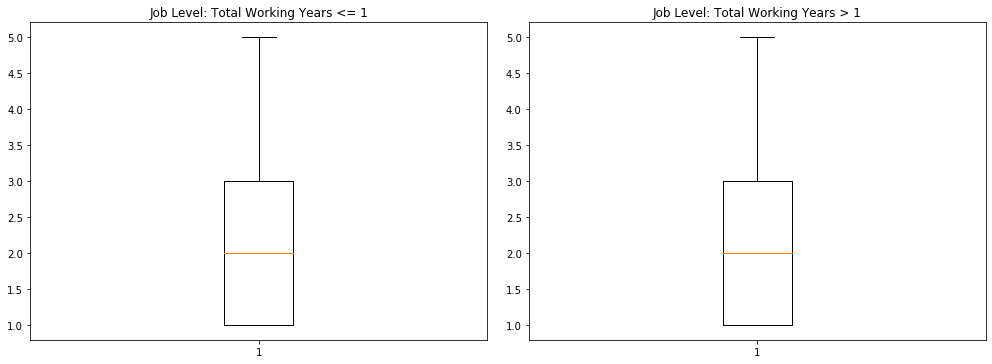

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
fig.tight_layout()

ax[0].boxplot(df[df['TotalWorkingYears'] <= 1].JobLevel)
ax[0].set_title('Job Level: Total Working Years <= 1')

ax[1].boxplot(df[df['TotalWorkingYears'] > 1].JobLevel)
ax[1].set_title('Job Level: Total Working Years > 1')

There is no significant difference in job level between people with little experience and people with more experience. A lower job level could have indicated an internship program (a turnover that was expected and planned in advance), but this doesn't appear to be the case.

### Years at Company

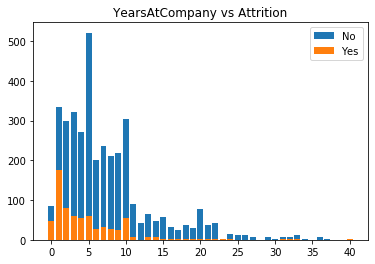

In [13]:
def plotAttritionPer(column):
    dfGroupsAll = df[[column, 'Attrition01']] \
        .groupby(column).count() \
        .merge(
            dfYes[[column, 'Attrition01']].groupby(column).count(),
            on=column,
            how='left'
        ).rename(columns = {
            'Attrition01_x': 'Attrition_all',
            'Attrition01_y': 'Attrition_yes'
        }).merge(
            dfNo[[column, 'Attrition01']].groupby(column).count(),
            on=column,
            how='left'
        ).rename(columns = {
            'Attrition01': 'Attrition_no'}
        ).fillna(0)

    plt.bar(dfGroupsAll.index, dfGroupsAll.Attrition_no, label="No")
    plt.bar(dfGroupsAll.index, dfGroupsAll.Attrition_yes, label="Yes")
    plt.title(column + ' vs Attrition')
    plt.legend()

plotAttritionPer('YearsAtCompany')

### Years with current Manager

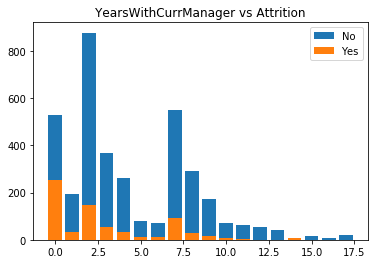

In [14]:
plotAttritionPer('YearsWithCurrManager')

### Age

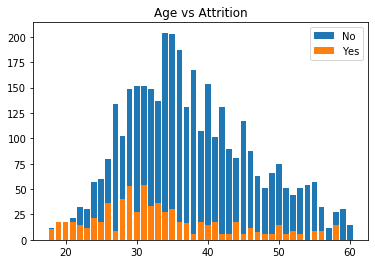

In [15]:
plotAttritionPer('Age')

In [16]:
from scipy.stats import ttest_rel

stats,p = ttest_rel(df.TotalWorkingYears, df.YearsAtCompany)
if p<0.05:
    print("Total working Years / Years at Company are related (", round(stats), ")\n", sep='')

stats,p = ttest_rel(df.YearsAtCompany, df.YearsWithCurrManager)
if p<0.05:
    print("Years at Company / Years with current Manager are related (", round(stats), ")\n", sep='')

stats,p = ttest_rel(df.TotalWorkingYears, df.Age)
if p<0.05:
    print("Total working years / Age are related (", round(stats), ")", sep='')

Total working Years / Years at Company are related (46.0)

Years at Company / Years with current Manager are related (47.0)

Total working years / Age are related (-247.0)


Unsurprisingly, the age, the total years of experience and number of years in the company are correlated, which explains that they are also a factor on attrition — people that are young, inexperienced and new to the company are more likely to leave.

## Business travel

In [17]:
crosstab = pd.crosstab(df.Attrition01, df.BusinessTravel, margins=True)
crosstab

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely,All
Attrition01,,,,
0,412,621,2644,3677
1,36,204,465,705
All,448,825,3109,4382


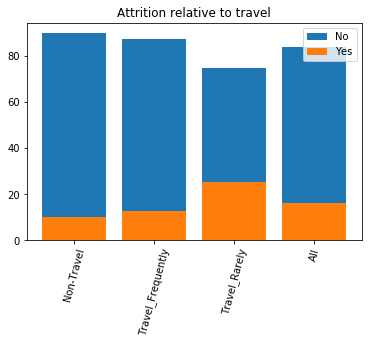

In [18]:
plt.bar(crosstab.columns, crosstab_propcol.iloc[0], label="No")
plt.bar(crosstab.columns, crosstab_propcol.iloc[1], label="Yes")
plt.legend()
plt.xticks(rotation=75)
plt.title("Attrition relative to travel")
plt.show()

People that travel frequently are more likely to leave

## Department

In [19]:
crosstab = pd.crosstab(df.Attrition01, df.Department, margins=True)
crosstab

Department,Human Resources,Research & Development,Sales,All
Attrition01,,,,
0,132,2416,1129,3677
1,55,449,201,705
All,187,2865,1330,4382


In [20]:
crosstab_propcol = round(crosstab.div(crosstab.iloc[-1,:], axis=1).mul(100, axis=1), 2)
crosstab_propcol.style.background_gradient(cmap='Blues')

Department,Human Resources,Research & Development,Sales,All
Attrition01,,,,
0,70.59,84.33,84.89,83.91
1,29.41,15.67,15.11,16.09
All,100,100,100,100


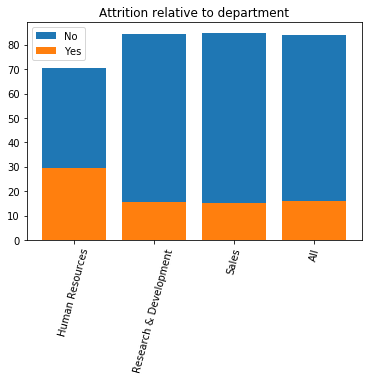

In [21]:
plt.bar(crosstab_propcol.columns, crosstab_propcol.iloc[0], label="No")
plt.bar(crosstab_propcol.columns, crosstab_propcol.iloc[1], label="Yes")
plt.legend()
plt.xticks(rotation=75)
plt.title("Attrition relative to department")
plt.show()

People working in human resources are more likely to leave.

### Related to other factors?

In [22]:
dfTest  = pd.DataFrame(data=[], columns=['ColumnName', 'PValue'])
dfHR    = df[df['Department'] == 'Human Resources']
dfNonHR = df[df['Department'] != 'Human Resources']

from scipy.stats import mannwhitneyu

for column in df.columns.drop(['Attrition', 'Attrition01', 'Department', 'EducationField', 'JobRole']):
    _,p=mannwhitneyu(dfHR[column], dfNonHR[column])

    if p<0.05:
        dfTest.loc[len(dfTest)] = [column, p]

dfTest.sort_values(by=['PValue'], ascending=True)

,ColumnName,PValue
9,YearsWithCurrManager,0.000123
0,BusinessTravel,0.000167
3,MaritalStatus,0.000423
6,TotalWorkingYears,0.001716
8,YearsAtCompany,0.002463
4,NumCompaniesWorked,0.005241
2,JobLevel,0.011059
5,PercentSalaryHike,0.014858
1,DistanceFromHome,0.020959
7,TrainingTimesLastYear,0.048786


### Department vs Business Travel

In [23]:
crosstab = pd.crosstab(df.Department, df.BusinessTravel, margins=True)
crosstab

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely,All
Department,,,,
Human Resources,9,24,154,187
Research & Development,329,516,2020,2865
Sales,110,285,935,1330
All,448,825,3109,4382


### Department vs Training Times

In [24]:
crosstab = pd.crosstab(df.Department, df.TrainingTimesLastYear, margins=True)
crosstab_proprow = round(crosstab.div(crosstab.iloc[:,-1], axis=0).mul(100, axis=0), 2)
display(crosstab_proprow.style.background_gradient(cmap='Blues'))

TrainingTimesLastYear,0,1,2,3,4,5,6,All
Department,,,,,,,,
Human Resources,1.6,8.02,37.97,40.11,5.88,4.81,1.6,100
Research & Development,3.77,4.68,37.94,32.01,8.38,8.55,4.68,100
Sales,3.83,4.74,35.41,35.64,8.57,7.52,4.29,100
All,3.7,4.84,37.17,33.46,8.33,8.08,4.43,100


In [25]:
print("Mean training times HR:", dfHR.TrainingTimesLastYear.mean())
print("Mean training times non HR:", dfNonHR.TrainingTimesLastYear.mean())

Mean training times HR: 2.6149732620320854
Mean training times non HR: 2.8064362336114423


### Department vs Salary Hike

In [26]:
crosstab = pd.crosstab(df.Department, df.PercentSalaryHike, margins=True)
crosstab_proprow = round(crosstab.div(crosstab.iloc[:,-1], axis=0).mul(100, axis=0), 2)
display(crosstab_proprow.style.background_gradient(cmap='Blues'))

PercentSalaryHike,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,All
Department,,,,,,,,,,,,,,,,
Human Resources,25.67,9.63,12.83,8.02,11.23,4.28,4.28,4.81,4.81,0,9.63,3.21,1.6,0,0,100
Research & Development,13.37,13.33,15.11,13.12,6.67,5.48,6.21,5.55,4.92,4.5,2.65,3.87,2.06,1.68,1.47,100
Sales,14.81,14.36,12.41,15.49,6.77,4.96,4.21,7.37,5.86,2.71,3.61,3.83,1.58,1.13,0.9,100
All,14.33,13.49,14.19,13.62,6.89,5.27,5.52,6.07,5.2,3.77,3.24,3.83,1.89,1.44,1.23,100


In [27]:
print("Mean salary hike HR:", dfHR.PercentSalaryHike.mean())
print("Mean salary hike non HR:", dfNonHR.PercentSalaryHike.mean())

Mean salary hike HR: 14.743315508021391
Mean salary hike non HR: 15.231466030989273


It seems likely that the attrition in the HR department is due to a lower job satisfaction.

## Education Field

In [28]:
crosstab = pd.crosstab(df.Attrition01, df.EducationField, margins=True)
crosstab_propcol = round(crosstab.div(crosstab.iloc[-1,:], axis=1).mul(100, axis=1), 2)

crosstab_propcol.style.background_gradient(cmap='Blues')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Attrition01,,,,,,,
0,60,83.33,84.21,83.97,87.7,88.52,83.91
1,40,16.67,15.79,16.03,12.3,11.48,16.09
All,100,100,100,100,100,100,100


Text(0.5, 1.0, 'Attrition relative to education field')

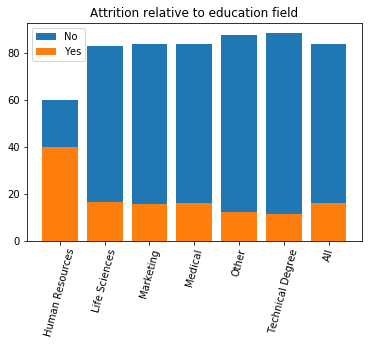

In [29]:
plt.bar(crosstab_propcol.columns, crosstab_propcol.iloc[0], label="No")
plt.bar(crosstab_propcol.columns, crosstab_propcol.iloc[1], label="Yes")
plt.legend()
plt.xticks(rotation=75)
plt.title("Attrition relative to education field")

In [30]:
crosstab = pd.crosstab(df.Department, df.EducationField)
chi2,p,dof,expected = chi2_contingency(crosstab)

if p<0.05:
    print("Department / Education field are related (", round((chi2/n)**0.5), ")", sep="")

Department / Education field are related (1.0)


This is the same information. Still, people working in human resources are more likely to leave.

## Monthly Income

In [31]:
dfNo.MonthlyIncome.sort_values().value_counts(bins=10, sort=False)

(10320.519, 29458.0]    929
(29458.0, 48406.0]      865
(48406.0, 67354.0]      703
(67354.0, 86302.0]      267
(86302.0, 105250.0]     276
(105250.0, 124198.0]    146
(124198.0, 143146.0]    138
(143146.0, 162094.0]     39
(162094.0, 181042.0]    137
(181042.0, 199990.0]    177
Name: MonthlyIncome, dtype: int64

In [32]:
dfYes.MonthlyIncome.sort_values().value_counts(bins=10, sort=False)

(9901.499, 28940.0]     195
(28940.0, 47790.0]      149
(47790.0, 66640.0]      158
(66640.0, 85490.0]       60
(85490.0, 104340.0]      44
(104340.0, 123190.0]     18
(123190.0, 142040.0]     18
(142040.0, 160890.0]     15
(160890.0, 179740.0]     24
(179740.0, 198590.0]     24
Name: MonthlyIncome, dtype: int64

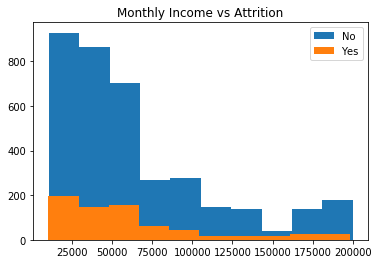

In [33]:
plt.hist(dfNo.MonthlyIncome, label="No")
plt.hist(dfYes.MonthlyIncome, label="Yes")
plt.title('Monthly Income vs Attrition')
plt.legend()

People with a lower income are more likely to leave, but the monthly income isn't a very big factor in and out of itself, as a lot of people with a low income stay.

### Monthly income vs Age

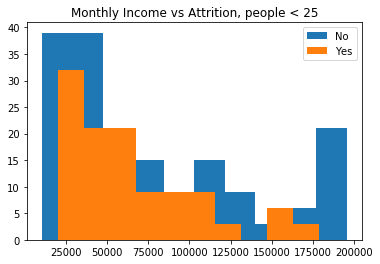

In [34]:
plt.hist(dfNo[dfNo['Age'] < 25].MonthlyIncome, label="No")
plt.hist(dfYes[dfYes['Age'] < 25].MonthlyIncome, label="Yes")
plt.title('Monthly Income vs Attrition, people < 25')
plt.legend()

People are more likely to leave if their monthly income is low when they're young.

## Years since last promotion

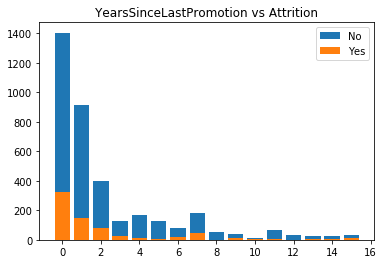

In [35]:
plotAttritionPer('YearsSinceLastPromotion')

People that received a promotion last year are way less likely to leave.

## Conclusion

Are more likely to leave:

* People that are new to the job market (almost 50% of people with a year of experience leave)
* People that are young — same trend as above, the two are correlated
* People that have to travel a frequently
* People that work in human resources
* People that didn't receive a promotion the current or last year

Actionable proposals:

* Hire people that already have some experience (>1)
* Reduce employees travel